In [1]:
#Importing The Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [2]:
import seaborn as sns

In [3]:
#Loading The data File
data=pd.read_excel("C:/Users/acer/Desktop/data.xlsx")
data.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2


In [4]:
data.shape

(1000, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [6]:
data.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [7]:
data.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

There are no null values in the data.

In [8]:
data["age"].value_counts()

41     51
39     50
35     48
36     44
42     43
38     41
53     40
45     40
54     39
47     38
44     37
48     34
50     33
51     32
56     29
33     27
60     25
57     24
63     22
59     21
69     18
62     17
65     17
66     17
71     17
68     15
32     14
74     14
30     14
72     12
75     12
81     10
78      9
86      9
83      8
95      8
77      8
80      7
92      7
90      6
87      5
96      5
98      5
99      5
111     4
101     3
102     3
84      3
89      3
113     2
93      2
29      2
105     1
Name: age, dtype: int64

It counts that how many times a value is present in a dataset.Example - 29 comes 2 times and 99 comes 5 times.

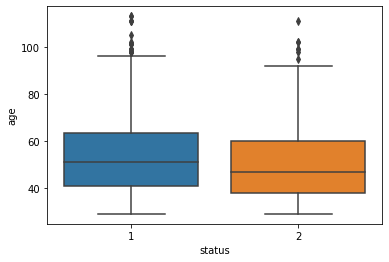

In [9]:
sns.boxplot(x='status',y='age',data=data)

Outliers are there in the age column so removing the rows from data in which age is greater than 95.As, people obove this age will do less Default.

In [10]:
#Dropping the records whose age is greater than and equal to 95
data1=data.loc[data["age"]<95]
data1.shape

(964, 21)

In [11]:
# Drop telephone column
data1.drop("telephone",axis=1,inplace=True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
data1.shape

(964, 20)

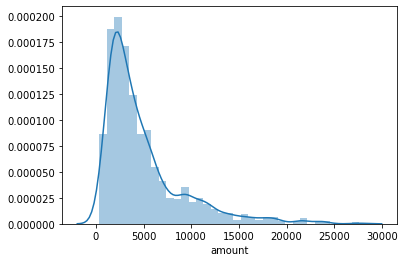

In [13]:
sns.distplot(data1['amount'])
plt.show()

As seen from the above graph,It is Right Skewed.So, we have to take the log transformation or MinMax Scaler to normalize the data.We will be using MinMax Scaler at the end so not taking the log transformation.

### Plotting the countplot
It gives that how many times a particular value comes in accordance with status.

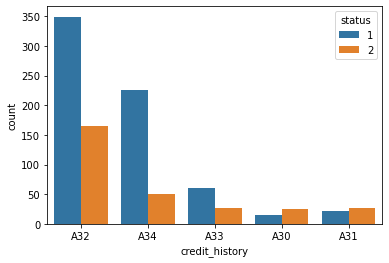

In [14]:
# countplot of "credit_history" with respect to "status".
sns.countplot(x ='credit_history', hue = "status", data = data1)

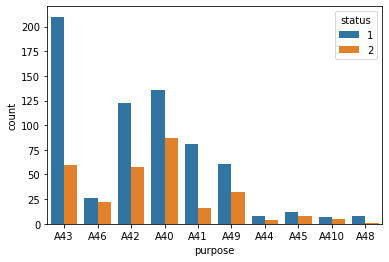

In [15]:
# countplot of "purpose" with respect to "status".
sns.countplot(x ='purpose', hue = "status", data = data1)

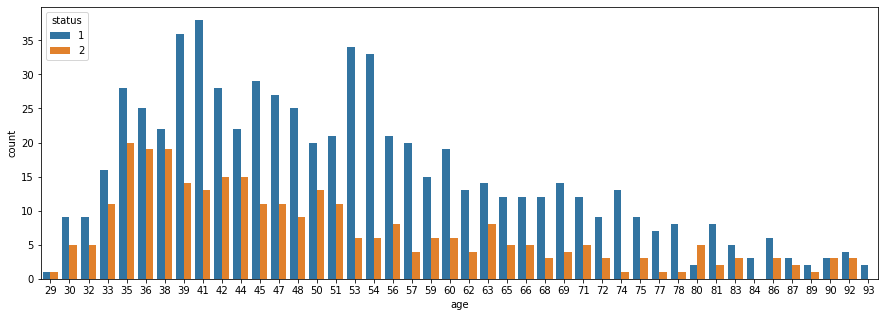

In [16]:
# countplot of "age" with respect to "status".
plt.figure(figsize=(15,5))
sns.countplot(x ='age', hue = "status", data = data1)

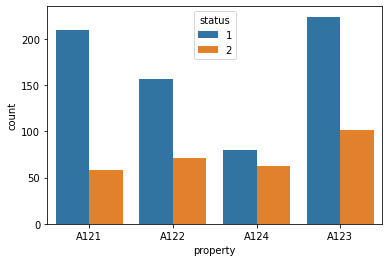

In [17]:
# countplot of "property" with respect to "status".
sns.countplot(x ='property', hue = "status", data = data1)

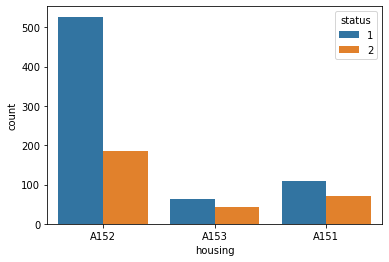

In [18]:
# countplot of "housing" with respect to "status".
sns.countplot(x ='housing', hue = "status", data = data)

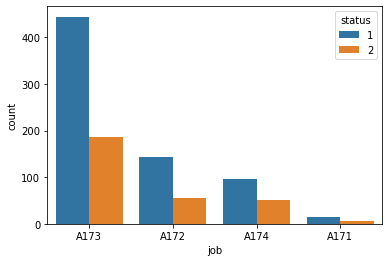

In [19]:
# countplot of "job" with respect to "status".
sns.countplot(x ='job', hue = "status", data = data)

### Observing Correlation between the features of the Dataset

In [20]:
num=data[["duration","amount","inst_rate","residing_since","age","num_credits","dependents","status"]]

In [21]:
num.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
0,9,1754,6,6,101,3,2,1
1,72,8927,3,3,33,2,2,2
2,18,3144,3,5,74,2,3,1
3,63,11823,3,6,68,2,3,1
4,36,7305,5,6,80,3,3,2


In [22]:
correlation = num.corr()

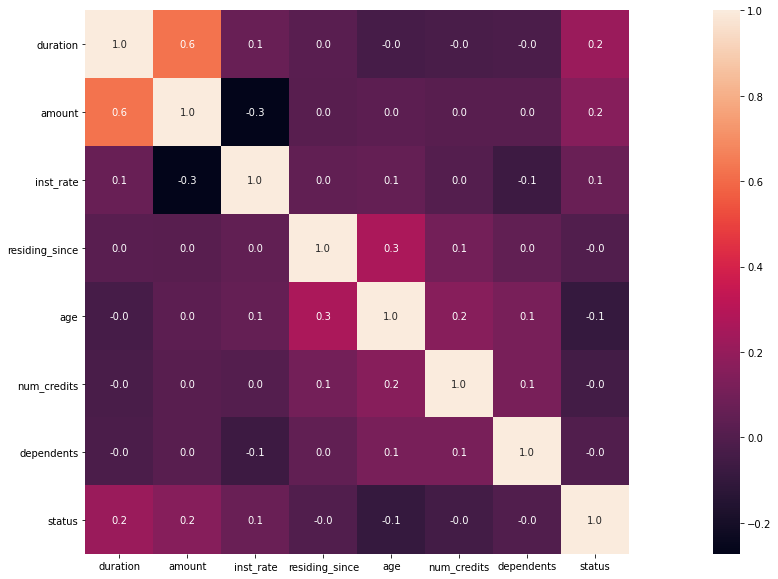

In [23]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

In [24]:
X = data.drop(['status'] , axis = 1)
y = data['status']

## Converting Categorical Data to Numerical Data

In [25]:
#Creating the Dummy Columns
dumm = pd.get_dummies(X.select_dtypes(include = 'object') , drop_first = True)
dumm.head()

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0


In [26]:
# Now concatinating it to data
df = pd.concat([X , dumm] , axis = 1)

In [27]:
df.shape

(1000, 61)

In [28]:
df1 = df.drop(df.select_dtypes(include = 'object').columns , axis = 1)


In [29]:
df1.shape

(1000, 48)

In [30]:
# Test Train Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1,y,test_size=0.10,random_state=0)

# MinMaxScaler

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mms = MinMaxScaler()

In [33]:
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

# Fitting a Model

In [34]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [36]:
#Making the predictions
y_pred=rfc.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [38]:
#Checking Accuracy, Precision, Recall, F1 Score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Tuned,0.75,0.804878,0.88,0.840764


# Hyperparameter Tuning


In [39]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [40]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.76


In [41]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': None, 'criterion': 'gini', 'n_estimators': 600}

In [42]:
# Making predictions based on grid search
y_pred_rf = grid_search_rf.predict(X_test)

In [43]:
#Checking Accuracy, Precision, Recall, F1 Score after hypertuning.
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Tuned,0.79,0.829268,0.906667,0.866242
